# Final Project for Applied Data Science Capstone.

## Where might be a good location in Toronto to open a Coffee Shop?

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
#pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
!pip install geocoder
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

print("Libraries imported.")

     |████████████████████████████████| 98 kB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 94 kB 6.4 MB/s  eta 0:00:01
Libraries imported.


In [2]:
# The code was removed by Watson Studio for sharing.

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No 

In [3]:
# Shape of dataframe

print("The shape of the dataframe is: {}".format(df_data_2.shape))

The shape of the dataframe is: (2383, 146)


In [4]:
# Figure out what are the categories used an classify the information

print("There are {} unique categories.".format(len(df_data_2['Category'].unique())))
print("The different categories are {}:".format(df_data_2['Category'].unique()))

There are 15 unique categories.
The different categories are ['Neighbourhood Information' 'Population'
 'Families, households and marital status' 'Language' 'Income'
 'Immigration and citizenship' 'Visible minority' 'Ethnic origin'
 'Aboriginal peoples' 'Education' 'Housing' 'Language of work' 'Labour'
 'Journey to work' 'Mobility']:


In [54]:
#Create new dataframe containing the names of the neighbourhoods and population

neighbourhoods_1 = df_data_2.iloc[[2]]
neighbourhoods_1 = neighbourhoods_1.drop(['_id', 'Topic', 'Data Source', 'Characteristic', 'City of Toronto'], axis = 1)
neighbourhoods_1 = neighbourhoods_1.reset_index(drop=True)
neighbourhoods_1

,Category,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Population,"29,113","23,757","12,054","30,526","27,695","15,873","25,797","21,396","13,154","23,236","6,577","29,960","22,291","21,737","7,727","14,257","9,266","11,499","17,757","11,669","9,955","10,968","13,362","31,340","26,984","16,472","15,935","14,133","9,666","17,180","27,051","25,003","36,625","35,052","11,785","21,381","15,535","22,776","9,456","22,372","18,588","11,848","21,933","12,806","10,732","30,491","14,417","9,917","15,723","22,162","23,925","12,494","16,934","10,948","12,416","15,545","14,365","13,641","43,965","14,366","11,058","17,123","17,945","22,000","9,271","7,985","43,993","16,164","14,607","15,179","16,828","15,559","10,084","43,794","10,111","10,554","26,572","33,964","17,455","20,506","13,593","32,954","16,775","29,658","11,463","16,097","23,831","31,180","11,916","18,615","13,845","21,210","18,675","9,233","13,826","34,805","10,722","7,804","15,818","11,051","10,803","10,529","22,246","14,974","20,923","46,496","10,070","9,941","16,724","21,849","27,876","17,812","24,623","25,051","27,446","15,683","21,567","10,360","21,108","16,556","7,607","17,510","65,913","27,392","33,312","26,274","17,992","11,098","27,917","50,434","16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"


In [55]:
#Shape of new dataframe

print("Shape of dataframe:{}".format(neighbourhoods_1.shape))
neighbourhoods_1.dtypes

Shape of dataframe:(1, 141)


Category                               object
Agincourt North                        object
Agincourt South-Malvern West           object
Alderwood                              object
Annex                                  object
Banbury-Don Mills                      object
Bathurst Manor                         object
Bay Street Corridor                    object
Bayview Village                        object
Bayview Woods-Steeles                  object
Bedford Park-Nortown                   object
Beechborough-Greenbrook                object
Bendale                                object
Birchcliffe-Cliffside                  object
Black Creek                            object
Blake-Jones                            object
Briar Hill-Belgravia                   object
Bridle Path-Sunnybrook-York Mills      object
Broadview North                        object
Brookhaven-Amesbury                    object
Cabbagetown-South St. James Town       object
Caledonia-Fairbank                

In [94]:
#Transpose dataframe

neighbourhoods_transposed = neighbourhoods_1.transpose()
neighbourhoods_transposed = neighbourhoods_transposed.reset_index()
neighbourhoods_transposed.columns = neighbourhoods_transposed.iloc[0]
neighbourhoods_transposed = neighbourhoods_transposed.drop(0, axis= 0)
neighbourhoods_transposed = neighbourhoods_transposed.reset_index(drop=True)
neighbourhoods_transposed = neighbourhoods_transposed.rename({'Category': 'Neighbourhood'}, axis=1)
neighbourhoods_transposed.head()

,Neighbourhood,Population
0,Agincourt North,"29,113"
1,Agincourt South-Malvern West,"23,757"
2,Alderwood,"12,054"
3,Annex,"30,526"
4,Banbury-Don Mills,"27,695"


In [57]:
neighbourhoods_transposed.dtypes

0
Neighbourhood    object
Population       object
dtype: object

In [58]:
neighbourhoods_transposed.isna().any()

0
Neighbourhood    False
Population       False
dtype: bool

In [59]:
# Removing comma in Population numbers

neighbourhoods_transposed['Population'] = neighbourhoods_transposed['Population'].replace(',', '', regex=True)

In [60]:
# Changing dtype

temp = neighbourhoods_transposed[['Population']].select_dtypes(object).columns
neighbourhoods_transposed[temp] = neighbourhoods_transposed[temp].apply(pd.to_numeric, errors='coerce')

In [95]:
print(neighbourhoods_transposed.dtypes)
neighbourhoods_transposed.head()

0
Neighbourhood    object
Population       object
dtype: object


,Neighbourhood,Population
0,Agincourt North,"29,113"
1,Agincourt South-Malvern West,"23,757"
2,Alderwood,"12,054"
3,Annex,"30,526"
4,Banbury-Don Mills,"27,695"


In [62]:
neighbourhoods_transposed['Neighbourhood'] = neighbourhoods_transposed['Neighbourhood'].astype('str')

In [63]:
neighbourhoods_transposed.dtypes

0
Neighbourhood    object
Population        int64
dtype: object

In [96]:
# Create dataframe in ascending order of population

neighbourhood_plot2 = neighbourhoods_transposed.copy()
neighbourhood_plot2.head()

,Neighbourhood,Population
0,Agincourt North,"29,113"
1,Agincourt South-Malvern West,"23,757"
2,Alderwood,"12,054"
3,Annex,"30,526"
4,Banbury-Don Mills,"27,695"


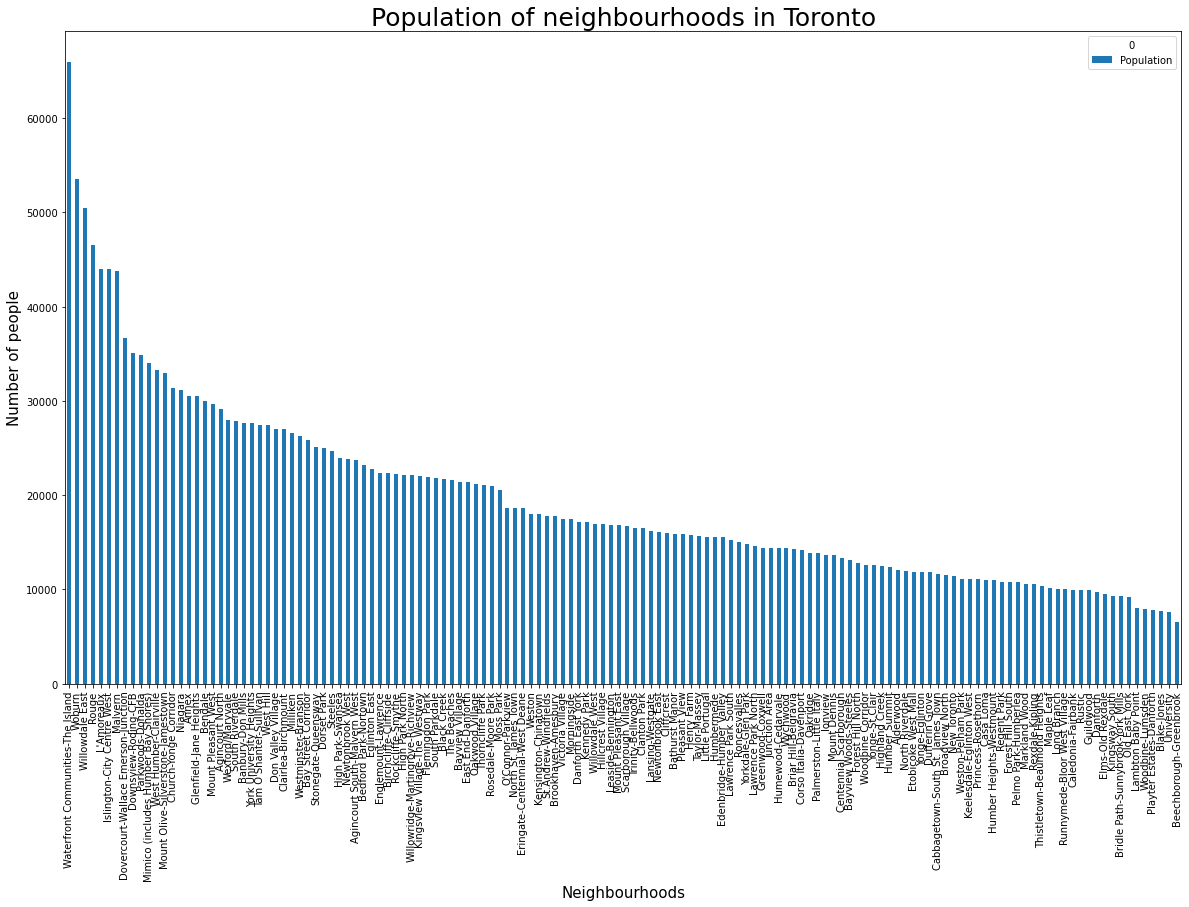

In [65]:
# Plot population of Toronto neighbourhoods to have a visual representation

neighbourhoods_plot1 = neighbourhoods_transposed.sort_values('Population', ascending=False).reset_index(drop=True)
neighbourhoods_plot1.plot(kind = 'bar', x='Neighbourhood', figsize=(20,12))

plt.title("Population of neighbourhoods in Toronto", fontsize = 25)
plt.xlabel("Neighbourhoods", fontsize = 15)
plt.ylabel("Number of people", fontsize = 15)


plt.show()

## Get latitude and longitude for neighbourhoods

In [73]:
import geocoder # import geocoder
postal_code = neighbourhood_plot2['Neighbourhood']

# Using while Statement
latitude = []
longitude = []
n = 0

while n < len(postal_code):
    g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code[n]))
    lat_lng_coords = g.latlng
    print('The geograpical coordinate of {} are {}, {}.'.format(postal_code[n], lat_lng_coords[0], lat_lng_coords[1]))
    latitude.append(lat_lng_coords[0])
    longitude.append(lat_lng_coords[1])
    n = n + 1

neighbourhood_plot2['Latitude'] = latitude
neighbourhood_plot2['Longitude'] = longitude

neighbourhood_plot2.head(12)

The geograpical coordinate of Agincourt North are 43.809300000000064, -79.26706999999999.
The geograpical coordinate of Agincourt South-Malvern West are 43.787360000000035, -79.26934999999997.
The geograpical coordinate of Alderwood are 43.60496000000006, -79.54115999999993.
The geograpical coordinate of Annex are 43.66936000000004, -79.40279999999996.
The geograpical coordinate of Banbury-Don Mills are 43.740410000000054, -79.34851999999995.
The geograpical coordinate of Bathurst Manor are 43.763780000000054, -79.45476999999994.
The geograpical coordinate of Bay Street Corridor are 43.657710000000066, -79.38617999999997.
The geograpical coordinate of Bayview Village are 43.777100000000075, -79.37956999999994.
The geograpical coordinate of Bayview Woods-Steeles are 43.794850000000054, -79.38221999999996.
The geograpical coordinate of Bedford Park-Nortown are 43.73066000000006, -79.42449999999997.
The geograpical coordinate of Beechborough-Greenbrook are 43.69311000000005, -79.478309999

,Neighbourhood,Population,Latitude,Longitude
0,Agincourt North,29113,43.80930,-79.26707
1,Agincourt South-Malvern West,23757,43.78736,-79.26935
2,Alderwood,12054,43.60496,-79.54116
3,Annex,30526,43.66936,-79.40280
4,Banbury-Don Mills,27695,43.74041,-79.34852
5,Bathurst Manor,15873,43.76378,-79.45477
6,Bay Street Corridor,25797,43.65771,-79.38618
7,Bayview Village,21396,43.77710,-79.37957
8,Bayview Woods-Steeles,13154,43.79485,-79.38222
9,Bedford Park-Nortown,23236,43.73066,-79.42450


## Create a map of Toronto and its neighbourhoods

In [75]:
# get the coordinates of Kuala Lumpur
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="project")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, Ontario {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, Ontario 43.6534817, -79.3839347.


In [76]:
# create map of Toronto using latitude and longitude values
map_kl = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighbourhood in zip(neighbourhood_plot2['Latitude'], neighbourhood_plot2['Longitude'], neighbourhood_plot2['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_kl)  
    
map_kl

## Use Foursquare API to get the neighbourhood venue information

In [37]:
# The code was removed by Watson Studio for sharing.

Your credentails are stored.


In [38]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [39]:
# Function to get the venue info for all neighbourhoods
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [77]:
# Code to call above function and create dataframe with all information

toronto_venues = getNearbyVenues(names = neighbourhood_plot2['Neighbourhood'], latitudes=neighbourhood_plot2['Latitude'], longitudes=neighbourhood_plot2['Longitude'])

Agincourt North
Agincourt South-Malvern West
Alderwood
Annex
Banbury-Don Mills
Bathurst Manor
Bay Street Corridor
Bayview Village
Bayview Woods-Steeles
Bedford Park-Nortown
Beechborough-Greenbrook
Bendale
Birchcliffe-Cliffside
Black Creek
Blake-Jones
Briar Hill-Belgravia
Bridle Path-Sunnybrook-York Mills
Broadview North
Brookhaven-Amesbury
Cabbagetown-South St. James Town
Caledonia-Fairbank
Casa Loma
Centennial Scarborough
Church-Yonge Corridor
Clairlea-Birchmount
Clanton Park
Cliffcrest
Corso Italia-Davenport
Danforth
Danforth East York
Don Valley Village
Dorset Park
Dovercourt-Wallace Emerson-Junction
Downsview-Roding-CFB
Dufferin Grove
East End-Danforth
Edenbridge-Humber Valley
Eglinton East
Elms-Old Rexdale
Englemount-Lawrence
Eringate-Centennial-West Deane
Etobicoke West Mall
Flemingdon Park
Forest Hill North
Forest Hill South
Glenfield-Jane Heights
Greenwood-Coxwell
Guildwood
Henry Farm
High Park North
High Park-Swansea
Highland Creek
Hillcrest Village
Humber Heights-Westmount
Hu

In [78]:
# Check the shape and view the first 5 rows of the new dataframe

print(toronto_venues.shape)
toronto_venues.head()

(1971, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt North,43.8093,-79.26707,Saravanaa Bhavan South Indian Restaurant,43.810117,-79.269275,Indian Restaurant
1,Agincourt North,43.8093,-79.26707,Menchie's,43.808338,-79.268288,Frozen Yogurt Shop
2,Agincourt North,43.8093,-79.26707,Congee Town 太皇名粥,43.809035,-79.267634,Chinese Restaurant
3,Agincourt North,43.8093,-79.26707,Booster Juice,43.809915,-79.269382,Juice Bar
4,Agincourt North,43.8093,-79.26707,Shoppers Drug Mart,43.808894,-79.269854,Pharmacy


In [79]:
# Check the categories

print("There are {} unique categories.".format(len(toronto_venues['Venue Category'].unique())))
print("The different categories are {}:".format(toronto_venues['Venue Category'].unique()))

There are 268 unique categories.
The different categories are ['Indian Restaurant' 'Frozen Yogurt Shop' 'Chinese Restaurant' 'Juice Bar'
 'Pharmacy' 'Discount Store' 'Sandwich Place' 'Coffee Shop'
 'Fried Chicken Joint' 'Bank' 'Beer Store' 'Pizza Place'
 'Vietnamese Restaurant' 'Movie Theater' 'Wings Joint' 'Clothing Store'
 'Spa' 'Convenience Store' 'Restaurant' 'Bakery' 'Sporting Goods Shop'
 'Ice Cream Shop' 'Fast Food Restaurant' 'Cantonese Restaurant'
 'Noodle House' 'Malay Restaurant' 'Seafood Restaurant' 'Pool Hall'
 'Mediterranean Restaurant' 'Pool' 'Shopping Mall' 'Filipino Restaurant'
 'American Restaurant' 'Park' 'Dance Studio'
 'Vegetarian / Vegan Restaurant' 'Hotel' 'Pub' 'Thai Restaurant'
 'Greek Restaurant' 'Japanese Restaurant' 'Creperie' 'Italian Restaurant'
 'Gym' 'Bookstore' 'Café' 'Museum' 'Burrito Place' 'Korean Restaurant'
 'Bubble Tea Shop' 'Falafel Restaurant' 'Social Club' 'Video Game Store'
 'Grocery Store' 'Ramen Restaurant' 'Concert Hall' 'Electronics Store'

### Analyze the neighbourhoods

In [80]:
# One hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood']
# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

print(toronto_onehot.shape)
toronto_onehot.head()

(1971, 269)


,Neighbourhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Quad,College Rec Center,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Library,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Optical Shop,Organic Grocery,Other Great Outdoors,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Road,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Syrian Restaurant,Taco Place,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt North,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [81]:
# Groupby neighbourhood and take the mean of the frequency

toronto_freq = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_freq.head()

,Neighbourhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Quad,College Rec Center,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Library,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Optical Shop,Organic Grocery,Other Great Outdoors,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Road,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Syrian Restaurant,Taco Place,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt North,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.076923,0.0,0.0,0.0,0.

In [82]:
len(toronto_freq[toronto_freq['Coffee Shop'] > 0 ])

62

In [83]:
# New Dataframe for coffee shops only

toronto_coffee = toronto_freq[['Neighbourhood', 'Coffee Shop']]
toronto_coffee.head()

,Neighbourhood,Coffee Shop
0,Agincourt North,0.038462
1,Agincourt South-Malvern West,0.000000
2,Alderwood,0.200000
3,Annex,0.119048
4,Banbury-Don Mills,0.200000


In [84]:
toronto_coffee['Normalized Population'] = neighbourhoods_transposed['Population']/neighbourhoods_transposed['Population'].max(axis=0)
toronto_coffee.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Neighbourhood,Coffee Shop,Normalized Population
0,Agincourt North,0.038462,0.441688
1,Agincourt South-Malvern West,0.000000,0.360430
2,Alderwood,0.200000,0.182877
3,Annex,0.119048,0.463126
4,Banbury-Don Mills,0.200000,0.420175


## Cluster Neighbourhoods

In [85]:
# set number of clusters
kclusters = 5

coffee_cluster = toronto_coffee.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(coffee_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 4, 2, 2, 1, 2, 0, 1, 0], dtype=int32)

In [86]:
#new dataframe to include the cluster labels

toronto_cluster = toronto_coffee.copy()
toronto_cluster['Cluster Labels'] = kmeans.labels_
toronto_cluster.head()

,Neighbourhood,Coffee Shop,Normalized Population,Cluster Labels
0,Agincourt North,0.038462,0.441688,0
1,Agincourt South-Malvern West,0.000000,0.360430,0
2,Alderwood,0.200000,0.182877,4
3,Annex,0.119048,0.463126,2
4,Banbury-Don Mills,0.200000,0.420175,2


In [87]:
toronto_cluster_2 = toronto_cluster
toronto_cluster_2 = toronto_cluster_2.join(neighbourhood_plot2.set_index('Neighbourhood'), on='Neighbourhood')
toronto_cluster_2 = toronto_cluster_2.drop('Population', axis=1)
toronto_cluster_2.head()

,Neighbourhood,Coffee Shop,Normalized Population,Cluster Labels,Latitude,Longitude
0,Agincourt North,0.038462,0.441688,0,43.80930,-79.26707
1,Agincourt South-Malvern West,0.000000,0.360430,0,43.78736,-79.26935
2,Alderwood,0.200000,0.182877,4,43.60496,-79.54116
3,Annex,0.119048,0.463126,2,43.66936,-79.40280
4,Banbury-Don Mills,0.200000,0.420175,2,43.74041,-79.34852


In [88]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_cluster_2['Latitude'], toronto_cluster_2['Longitude'], toronto_cluster_2['Neighbourhood'], toronto_cluster_2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

In [89]:
#Cluster 1 
toronto_cluster.loc[toronto_cluster['Cluster Labels'] == 0, toronto_cluster.columns[[0] + [1] + [2] + list(range(3, toronto_cluster.shape[1]))]]

,Neighbourhood,Coffee Shop,Normalized Population,Cluster Labels
0,Agincourt North,0.038462,0.441688,0
1,Agincourt South-Malvern West,0.000000,0.360430,0
7,Bayview Village,0.000000,0.324610,0
9,Bedford Park-Nortown,0.090909,0.352525,0
11,Bendale,0.000000,0.454539,0
12,Birchcliffe-Cliffside,0.000000,0.338188,0
13,Black Creek,0.000000,0.329783,0
30,Don Valley Village,0.000000,0.410405,0
31,Dorset Park,0.090909,0.379333,0
33,Downsview-Roding-CFB,0.000000,0.531792,0


In [90]:
#Cluster 2 
toronto_cluster.loc[toronto_cluster['Cluster Labels'] == 1, toronto_cluster.columns[[0] + [1] + [2] + list(range(3, toronto_cluster.shape[1]))]]

,Neighbourhood,Coffee Shop,Normalized Population,Cluster Labels
5,Bathurst Manor,0.000000,0.240817,1
8,Bayview Woods-Steeles,0.000000,0.199566,1
10,Beechborough-Greenbrook,0.000000,0.099783,1
14,Blake-Jones,0.000000,0.117230,1
17,Broadview North,0.000000,0.174457,1
18,Brookhaven-Amesbury,0.000000,0.269401,1
20,Caledonia-Fairbank,0.000000,0.151032,1
22,Centennial Scarborough,0.000000,0.202722,1
25,Clanton Park,0.000000,0.249905,1
27,Corso Italia-Davenport,0.058824,0.214419,1


In [91]:
#Cluster 3 
toronto_cluster.loc[toronto_cluster['Cluster Labels'] == 2, toronto_cluster.columns[[0] + [1] + [2] + list(range(3, toronto_cluster.shape[1]))]]

,Neighbourhood,Coffee Shop,Normalized Population,Cluster Labels
3,Annex,0.119048,0.463126,2
4,Banbury-Don Mills,0.200000,0.420175,2
6,Bay Street Corridor,0.209677,0.391380,2
23,Church-Yonge Corridor,0.110000,0.475475,2
24,Clairlea-Birchmount,0.142857,0.409388,2
32,Dovercourt-Wallace Emerson-Junction,0.047619,0.555657,2
81,Mount Olive-Silverstone-Jamestown,0.500000,0.499962,2
83,Mount Pleasant West,0.132075,0.449957,2
110,South Riverdale,0.125000,0.422921,2
124,West Humber-Clairville,0.142857,0.505393,2


In [92]:
#Cluster 4 
toronto_cluster.loc[toronto_cluster['Cluster Labels'] == 3, toronto_cluster.columns[[0] + [1] + [2] + list(range(3, toronto_cluster.shape[1]))]]

,Neighbourhood,Coffee Shop,Normalized Population,Cluster Labels
58,Islington-City Centre West,0.086957,0.667016,3
66,Lambton Baby Point,0.000000,0.667440,3
73,Malvern,0.000000,0.664421,3
105,Rouge,0.000000,0.705415,3
122,Waterfront Communities-The Island,0.142857,1.000000,3
129,Willowdale East,0.000000,0.765160,3
132,Woburn,0.000000,0.811448,3


In [93]:
#Cluster 5 
toronto_cluster.loc[toronto_cluster['Cluster Labels'] == 4, toronto_cluster.columns[[0] + [1] + [2] + list(range(3, toronto_cluster.shape[1]))]]

,Neighbourhood,Coffee Shop,Normalized Population,Cluster Labels
2,Alderwood,0.200000,0.182877,4
15,Briar Hill-Belgravia,0.100000,0.216300,4
16,Bridle Path-Sunnybrook-York Mills,0.142857,0.140579,4
19,Cabbagetown-South St. James Town,0.090909,0.177036,4
21,Casa Loma,0.090909,0.166401,4
26,Cliffcrest,0.125000,0.241758,4
28,Danforth,0.090909,0.146648,4
29,Danforth East York,0.090909,0.260647,4
34,Dufferin Grove,0.084746,0.178796,4
40,Eringate-Centennial-West Deane,0.200000,0.282008,4
